In [14]:
import pandas as pd
import numpy as np
import os

dir_path = os.path.abspath('') #os.path.dirname(os.path.realpath(__file__))
FILE = dir_path + '/aria_dati_2.csv'
fr = pd.read_csv(FILE)

p1 = np.array(fr['p1m'][:6]) * 1000 # kPa -> Pa
p2 = np.array(fr['p2m'][:6]) * 1000
p3 = np.array(fr['p3m'][:6]) * 1000
p4 = np.array(fr['p4m'][:6]) * 1000
R = np.array(fr['Rm'][:6]) / 60000 # L/min listri per munuto

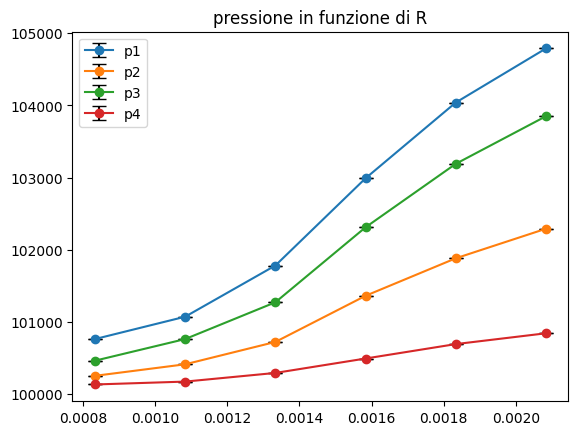

In [15]:
import matplotlib.pyplot as plt

plt.title('pressione in funzione di R')
plt.errorbar(R,p1,fmt='o-',yerr=0.01,capsize=5, ecolor='black',label='p1')
plt.errorbar(R,p2,fmt='o-',yerr=0.01,capsize=5, ecolor='black',label='p2')
plt.errorbar(R,p3,fmt='o-',yerr=0.01,capsize=5, ecolor='black',label='p3')
plt.errorbar(R,p4,fmt='o-',yerr=0.01,capsize=5, ecolor='black',label='p4')
plt.legend()

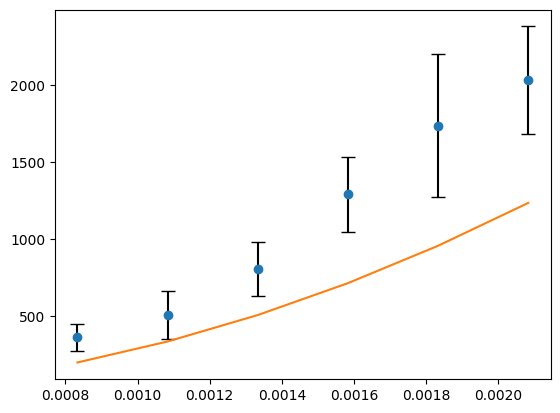

In [16]:
A_l = 1.99 / 10000 #cm^2 -> m^2 area larga
A_s = 0.452 / 10000 # area stretta


# offset per la pressione:
o1 = 0.249 * 1000
o2 = 0.166 * 1000
o3 = 0.198 * 1000
o4 = 0.300 * 1000

p_l = p1 - o1
p_S = p2 - o2 + (p1 - o1 - p3 + o3)/2
P_osservato = p_l - p_S

v_l = R / A_l
v_s = R / A_s
d_aria = 1.225 # kg/m^3
P_attesi = 0.5 * d_aria * ((1/A_s)**2 - (1/A_l)**2) * R**2 

# propagazione errori:
std_p1 = np.array([0.06,0.13,0.15,0.21,0.39,0.28]) * 1000
std_p2 = np.array([0.05,0.05,0.05,0.06,0.14,0.14]) * 1000
std_p3 = np.array([0.02,0.06,0.10,0.13,0.29,0.24]) * 1000

sigma_pl = std_p1
sigma_ps = np.sqrt(std_p2**2 + (np.sqrt(std_p1**2 + std_p2**2)/2)**2)
sigma_P_osservato = np.sqrt(sigma_pl**2 + sigma_ps**2)


# TODO: cambiare yerr
plt.errorbar(R,P_osservato,fmt='o',yerr=sigma_P_osservato,capsize=5, ecolor='black',label='$\Delta p$')
plt.plot(R,P_attesi)

# a questo punto i nostri avventurieri si accorsero che nelle prime 4 righe di consegna specificava che il flusso dovesse essere compreso fra 10 e 60 L/min, rifecero le misure

il rimpianto e lo sgomento all'accorgersi che alle 14.55 avevano sprecato 4 ore di misurazioni per valori del tutto errati li portò a rivalutare il proprio percorso di fisici e diventare panettieri.

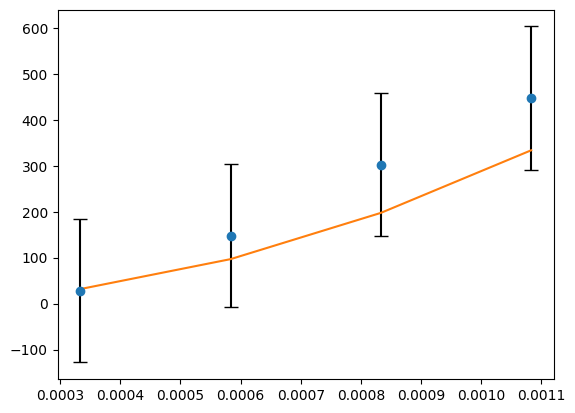

In [25]:
FILE = dir_path + '/aria_dati_3.csv'
fr = pd.read_csv(FILE)

p1 = np.array(fr['p1']) * 1000 # kPa -> Pa
p2 = np.array(fr['p2']) * 1000
p3 = np.array(fr['p3']) * 1000
p4 = np.array(fr['p4']) * 1000
R = np.array(fr['R']) / 60000 # L/min listri per munuto

p_l = p1 - o1
p_S = p2 - o2 + (p1 - o1 - p3 + o3)/2
P_osservato = p_l - p_S

v_l = R / A_l
v_s = R / A_s

P_attesi = 0.5 * d_aria * ((1/A_s)**2 - (1/A_l)**2) * R**2 

# TODO: cambiare yerr
plt.errorbar(R,P_osservato,fmt='o',yerr=sigma_P_osservato[1],capsize=5, ecolor='black',label='$\Delta p$')
plt.plot(R,P_attesi)